# CARGADO DE DATOS


In [5]:
import pandas as pd
from funpymodeling.exploratory import status

In [6]:
#Para este caso nos interesa visualizar todas las columnas 
pd.set_option('Display.max_columns', None)

Concatenando los dos archivos

In [7]:
train_data = pd.read_csv(r'C:\Users\geosh\Documents\airlinemodel\train.csv')
test_data = pd.read_csv(r'C:\Users\geosh\Documents\airlinemodel\test.csv')

In [8]:
all_data = pd.concat([train_data,test_data],axis=0)

In [9]:
all_data.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [10]:
import mlflow.sklearn

Le asignamos un nombre al experiment

In [11]:
mlflow.set_experiment(experiment_name="modelo_aerolinea")

<Experiment: artifact_location='file:///C:/Users/geosh/mlruns/457373171922913010', creation_time=1700378979654, experiment_id='457373171922913010', last_update_time=1700378979654, lifecycle_stage='active', name='modelo_aerolinea', tags={}>

VAMOS A SELECCIONAR ALGUNAS COLUMNAS

In [12]:
data = all_data[['Age','Class','Inflight wifi service', 'Ease of Online booking','Seat comfort','Checkin service','satisfaction']].copy()

CAMBIAMOS EL NOMBRE DE LAS COLUMNAS

In [13]:
data.rename(columns = {'Inflight wifi service':'wifi',
                      'Ease of Online booking':'booking',
                      'Seat comfort':'seat',
                      'Checkin service':'checkin'},inplace=True)

Cambiar los valores de satisfaction

In [14]:
#mapeamos la columna de satisfaccion con 0 y 1

class_map = {'neutral or dissatisfied':0, 'satisfied':1}
data['satisfaction']= data['satisfaction'].map(class_map)

In [15]:
data

,Age,Class,wifi,booking,seat,checkin,satisfaction
0,13,Eco Plus,3,3,5,4,0
1,25,Business,3,3,1,1,0
2,26,Business,2,2,5,4,1
3,25,Business,2,5,2,1,0
4,61,Business,3,3,5,3,1
...,...,...,...,...,...,...,...
25971,34,Business,3,3,4,4,0
25972,23,Business,4,4,4,5,1
25973,17,Eco,2,1,2,5,0
25974,14,Business,3,3,4,4,1


In [16]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.0,0,0.000000,75,int64
1,Class,0,0.0,0,0.000000,3,object
2,wifi,0,0.0,3916,0.030151,6,int64
3,booking,0,0.0,5682,0.043748,6,int64
4,seat,0,0.0,1,0.000008,6,int64
5,checkin,0,0.0,1,0.000008,6,int64
6,satisfaction,0,0.0,73452,0.565537,2,int64


In [17]:
data = pd.get_dummies(data)


In [18]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.0,0,0.000000,75,int64
1,wifi,0,0.0,3916,0.030151,6,int64
2,booking,0,0.0,5682,0.043748,6,int64
3,seat,0,0.0,1,0.000008,6,int64
4,checkin,0,0.0,1,0.000008,6,int64
5,satisfaction,0,0.0,73452,0.565537,2,int64
6,Class_Business,0,0.0,67720,0.521404,2,bool
7,Class_Eco,0,0.0,71571,0.551055,2,bool
8,Class_Eco Plus,0,0.0,120469,0.927541,2,bool


# CLASIFICACION

In [19]:
data_x = data.drop('satisfaction', axis=1)
data_y = data['satisfaction']

In [20]:
#porcentaje del data set para el test 
test_size = 0.3 
mlflow.log_param("porcentaje de test", test_size)

0.3

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)

CREACION DE MODELO PREDICTIVO

In [22]:
#CREACION DE 100 DECISION TREES
NUM_ESTIMATORS = 100
RANDOM_STATE = 99


In [23]:
mlflow.log_param("numero de estimadores", NUM_ESTIMATORS)
mlflow.log_param("valor semilla", RANDOM_STATE)

99

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(n_estimators = NUM_ESTIMATORS, random_state=RANDOM_STATE)

In [26]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()


In [27]:
#MODELAMOS EL ARBOL CON LOS DATOS 
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=99)

# PREDICCION DE LA CLASE

In [28]:
y_predict = rf.predict(x_test.to_numpy())

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz

In [40]:
y_test = y_test.to_numpy()

In [36]:
y_predict

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [41]:
matrix = confusion_matrix(y_test,y_predict)
matrix

array([[19652,  2347],
       [ 2213, 14752]], dtype=int64)

creación de heatmap

In [45]:
y_test

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

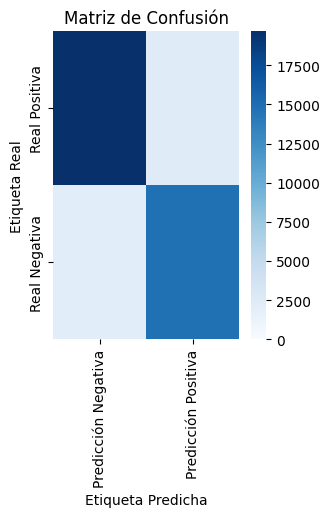

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
# Crear un heatmap
plt.figure(figsize=(3, 4))
sns.heatmap(matrix, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["Predicción Negativa", "Predicción Positiva"],
            yticklabels=["Real Positiva", "Real Negativa"],
            vmin=0, vmax=datosdf.values.max()) 
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

In [90]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     21999
           1       0.86      0.87      0.87     16965

    accuracy                           0.88     38964
   macro avg       0.88      0.88      0.88     38964
weighted avg       0.88      0.88      0.88     38964



In [91]:
from sklearn.metrics import RocCurveDisplay

C:\Users\geosh\anaconda3\envs\analytics\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\geosh\anaconda3\envs\analytics\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\geosh\anaconda3\envs\analytics\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\geosh\anaconda3\envs\analytics\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extensio

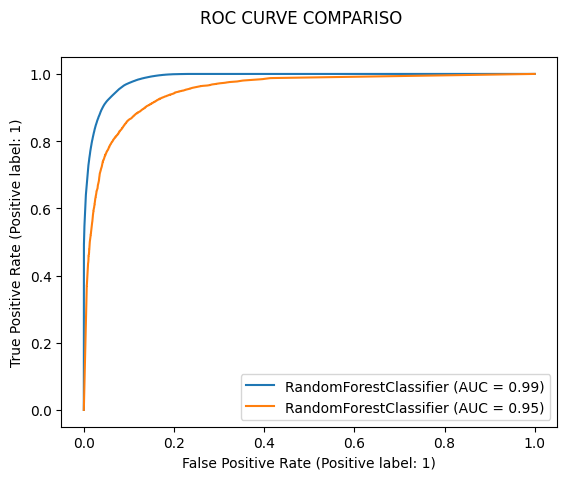

In [95]:
tr_disp = RocCurveDisplay.from_estimator(rf, x_train, y_train)
tr_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=tr_disp.ax_)
tr_disp.figure_.suptitle("ROC CURVE COMPARISO")
plt.show()

In [102]:
import pickle

In [103]:
#guardamos modelo
filename = 'rfmodel'
pickle.dump(rf,open(filename,'wb'))

In [104]:
rf_loaded = pickle.load(open(filename,'rb'))

In [113]:
#guardamos las columnas sin satisfaccion
with open('categories_ohe.pickle','wb') as handle:
    pickle.dump(data_x.columns, handle, protocol=pickle.HIGHEST_PROTOCOL)